# Classification

A classification task in machine learning involves assigning predefined labels or categories to input data based on its features. Mathematically, it can be represented as follows:

Given a dataset $\mathcal{D}$ with $n$ samples and their corresponding class labels:

$D = \{(x_1, y_1), (x_2, y_2), \dots (x_n, y_n)$

where $x_i$ represents the features of the i-th sample, and $y_i$ is its class label.

The goal is to learn a mapping function $f$ that accurately predicts the class label $y$ for a new sample with features $x$:

$ y = f(X)$

In a classification problem, $y$ typically belongs to a discrete set of classes or categories. The objective is to train a model that generalizes well to unseen data, correctly classifying it into the appropriate category.

Common classification algorithms include logistic regression, support vector machines, decision trees, k-nearest neighbors, and neural networks. These algorithms aim to find decision boundaries or decision functions to distinguish between different classes based on the input features.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

## Logistic Regression

Logistic regression is a supervised machine learning algorithm used for binary classification tasks, where the goal is to predict whether an observation belongs to one of two classes. Despite its name, logistic regression is used for classification, not regression.

**How Logistic Regression works:**

1. **Sigmoid Function:** Logistic regression applies the sigmoid function (also called the logistic function) to a linear combination of input features. The sigmoid function outputs values between 0 and 1, which can be interpreted as probabilities.

   $ P(y=1) = \frac{1}{1 + e^{-(b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + \ldots + b_n \cdot x_n)}} $

2. **Decision Boundary:** The algorithm classifies observations based on a decision boundary. If the predicted probability is greater than a certain threshold (typically 0.5), the observation is assigned to one class; otherwise, it is assigned to the other.


In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[60,  2],
       [11, 27]], dtype=int64)

C:\Users\sarah\AppData\Local\Temp\ipykernel_2364\1187954496.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


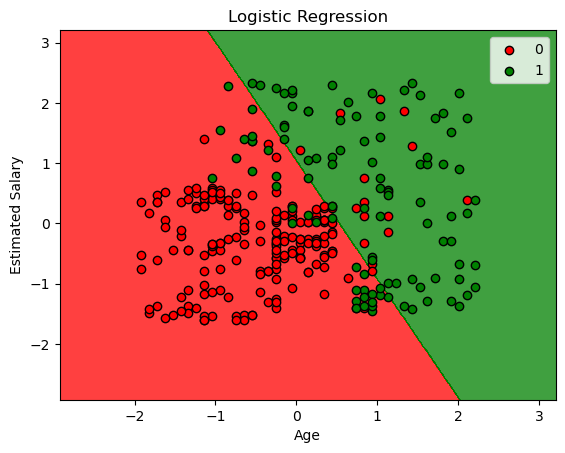

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.legend()
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [14]:
clf.score(X_test, y_test)

0.87

## KNN 

K-Nearest Neighbors (KNN) is a simple and versatile supervised machine learning algorithm used for both classification and regression tasks. In KNN, an object is classified by the majority vote of its k nearest neighbors, where \(k\) is a user-defined parameter.

**How KNN works:**

1. **Distance Calculation:** KNN calculates the distance (usually Euclidean distance) between the query point and all the training data points.

2. **Neighbor Selection:** It then identifies the \(k\) data points with the shortest distances to the query point.

3. **Majority Vote (Classification):** For classification, the algorithm assigns the class label that is most common among the \(k\) nearest neighbors to the query point.

4. **Average (Regression):** For regression, KNN calculates the average of the \(k\) nearest neighbors' target values and assigns it as the predicted value for the query point.

**Exercice**: instiate a KNN learner and fit it to the data.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = clf.predict(X_test)

C:\Users\sarah\AppData\Local\Temp\ipykernel_2364\337345245.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


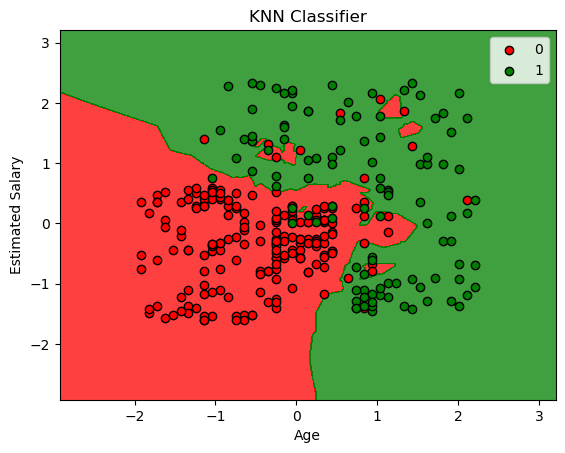

In [33]:
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.legend()

plt.title('KNN Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

**Exercice**: Comment the results.

la classification nest pas bonne 

## SVM

A Support Vector Machine (SVM) is a supervised machine learning algorithm. SVM is particularly effective for high-dimensional datasets and situations where clear decision boundaries are needed. In classification, SVM aims to find a hyperplane that best separates the data into different classes, maximizing the margin between the classes.

**Key concepts of SVM:**

1. **Hyperplane:** In a two-dimensional space, a hyperplane is a line that separates two classes. In higher-dimensional spaces, it becomes a plane or a hyperplane.

2. **Margin:** The margin is the distance between the hyperplane and the nearest data point from each class. SVM seeks to maximize this margin.

3. **Support Vectors:** Support vectors are the data points that lie closest to the hyperplane and contribute to determining the optimal decision boundary.


In [24]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='rbf', random_state=0).fit(X_train, y_train)

C:\Users\sarah\AppData\Local\Temp\ipykernel_2364\3854902131.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


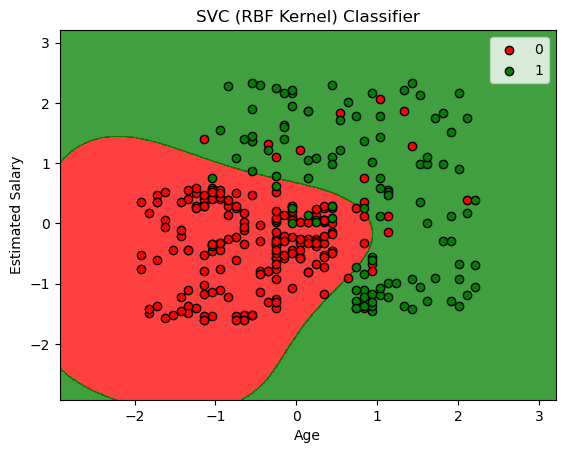

In [25]:
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.legend()

plt.title('SVC (RBF Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

**Exercice**: Apply the SVM to the classification task with the polynomial feature. 

C:\Users\sarah\AppData\Local\Temp\ipykernel_2364\1407410732.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


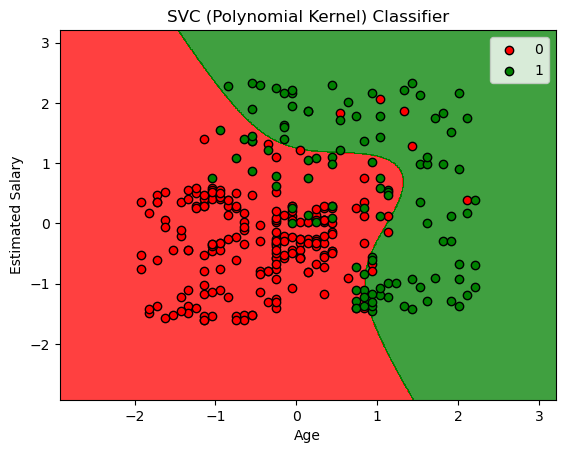

In [34]:
clf = SVC(kernel='poly', random_state=0).fit(X_train, y_train)

plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.legend()

plt.title('SVC (Polynomial Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

**Exercice**: Comment the results.

In [ ]:
la classification nest pas bonne

## Random Forest

A Random Forest is an ensemble learning method in machine learning that operates by constructing a multitude of decision trees during training and outputs the mode of the individual trees. It is a versatile and powerful algorithm known for its high accuracy and robustness.

**Key characteristics of Random Forest:**

1. **Decision Trees:** Random Forest consists of a collection of decision trees, each trained on a random subset of the data and features.

2. **Bootstrap Aggregating (Bagging):** The algorithm employs bagging, a technique where multiple subsets (bootstrapped samples) of the original dataset are used to train each decision tree.

3. **Feature Randomization:** Random Forest introduces randomness by considering only a random subset of features at each split when constructing each tree. This helps reduce overfitting and enhances generalization.

4. **Voting or Averaging:** For classification tasks, the final prediction is determined by a majority vote of the individual trees, and for regression tasks, it is the average prediction.


**Exercice**: Apply the Random Forest to the classification task.

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

C:\Users\sarah\AppData\Local\Temp\ipykernel_2364\3891365235.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


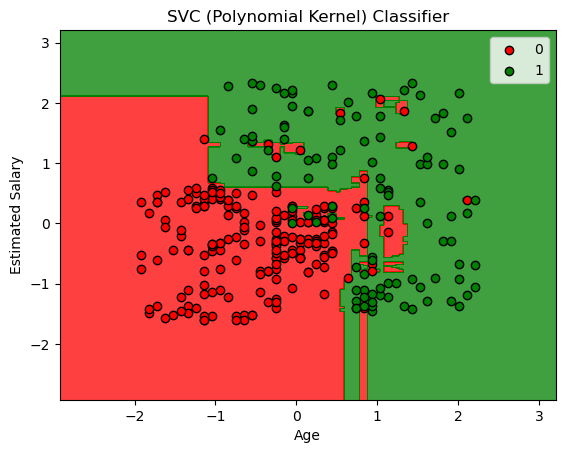

In [30]:
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.legend()

plt.title('SVC (Polynomial Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

la classification est bonne avec le forest 